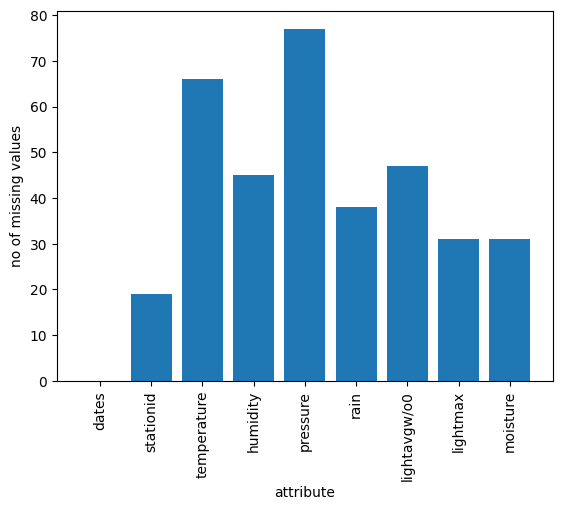

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

data = pd.read_csv("landslide_data3_miss.csv")
attribute = []
miss_val = []
for x in data:
    attribute.append(x)
    miss_val.append(data[x].isnull().sum())
plt.bar(attribute, miss_val)
plt.xlabel("attribute")
plt.ylabel("no of missing values")
plt.xticks(rotation=90)
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("pima-indians-diabetes.csv")
for x in data:
    if(x != "class"):
        med = data[x].median()
        # IQR
        Q1 = np.percentile(data[x], 25)

        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1
        x_size = data[x].size
        for i in range(int(x_size)):
            if data.iloc[i][x] >= (Q3+1.5*IQR) or data.iloc[i][x] <= (Q1-1.5*IQR):
                data.iloc[i][x] = med
        data[x] = [med if value >= (
            Q3+1.5*IQR) or value <= (Q1-1.5*IQR) else value for value in data[x]]
for x in data:
    if x != "class":
        print("min value of ", x, data[x].min())
        print("max value of ", x, data[x].max())

# normalization min max scaler
data_normalize=data.copy()
for column in data_normalize.columns:
    data_normalize[column] = ((data_normalize[column]- data_normalize[column].abs().min() )/ (data_normalize[column].abs().max() - data_normalize[column].abs().min() ))*7 +5


for x in data_normalize:
    if x != "class":
        print("min value of ", x, data_normalize[x].min())
        print("max value of ", x, data_normalize[x].max())


min value of  pregs 0.0
max value of  pregs 13.0
min value of  plas 44.0
max value of  plas 199.0
min value of  pres 38.0
max value of  pres 106.0
min value of  skin 0.0
max value of  skin 63.0
min value of  test 0.0
max value of  test 318.0
min value of  BMI 18.2
max value of  BMI 50.0
min value of  pedi 0.078
max value of  pedi 1.191
min value of  Age 21.0
max value of  Age 66.0
min value of  pregs 5.0
max value of  pregs 12.0
min value of  plas 5.0
max value of  plas 12.0
min value of  pres 5.0
max value of  pres 12.0
min value of  skin 5.0
max value of  skin 12.0
min value of  test 5.0
max value of  test 12.0
min value of  BMI 5.0
max value of  BMI 12.0
min value of  pedi 5.0
max value of  pedi 12.0
min value of  Age 5.0
max value of  Age 12.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("pima-indians-diabetes.csv")
for x in data:
    if(x != "class"):
        med = data[x].median()
        # IQR
        Q1 = np.percentile(data[x], 25)

        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1
        x_size = data[x].size
        for i in range(int(x_size)):
            if data.iloc[i][x] >= (Q3+1.5*IQR) or data.iloc[i][x] <= (Q1-1.5*IQR):
                data.iloc[i][x] = med
        data[x] = [med if value >= (
            Q3+1.5*IQR) or value <= (Q1-1.5*IQR) else value for value in data[x]]

for x in data:
    if x != "class":
        print("mean value of ", x, data[x].mean())
        print("std value of ", x, data[x].std())
        print()

print()
print()

# copy the data
data_z_scaled = data.copy()

# apply normalization technique
for column in data_z_scaled:
    data_z_scaled[column] = (
        data_z_scaled[column] - data_z_scaled[column].mean()) / data_z_scaled[column].std()

for x in data_z_scaled:
    if x != "class":
        print("mean value of ", x, data_z_scaled[x].mean())
        print("std value of ", x, data_z_scaled[x].std())
        print()


mean value of  pregs 3.7825520833333335
std value of  pregs 3.270644231185031

mean value of  plas 121.65625
std value of  plas 30.43828582241517

mean value of  pres 72.19661458333333
std value of  pres 11.146722742501334

mean value of  skin 20.4375
std value of  skin 15.698553733035284

mean value of  test 60.919270833333336
std value of  test 77.63566579465243

mean value of  BMI 32.19895833333334
std value of  BMI 6.410557943798964

mean value of  pedi 0.42766731770833327
std value of  pedi 0.2451623740187652

mean value of  Age 32.760416666666664
std value of  Age 11.055384847014684



mean value of  pregs -5.551115123125783e-17
std value of  pregs 0.9999999999999998

mean value of  plas -1.3877787807814457e-17
std value of  plas 1.0

mean value of  pres 4.001428817919835e-16
std value of  pres 0.9999999999999999

mean value of  skin -1.3877787807814457e-17
std value of  skin 1.0

mean value of  test -5.3198186596622086e-17
std value of  test 1.0

mean value of  BMI -6.1293562817

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("part a.")
data = pd.read_csv("landslide_data3_miss.csv")
x = data["stationid"].isnull().sum()
data.dropna(subset=["stationid"], inplace=True)
print("total number of tuples deleted : ", x)
print("percentage of total number of tuples is deleted :",
      x/len(data["stationid"]))
print("part b.")
x = []
y = data["stationid"].size
for i in range(int(y)):
    if (data.iloc[i, :].isnull().sum()) >= 3:
        x.append(i)
data = data.drop(x)
print("total number of tuples deleted : ", len(x))
print("percentage of total number of tuples is deleted :",
      len(x)/len(data["stationid"]))


part a.
total number of tuples deleted :  19
percentage of total number of tuples is deleted : 0.020518358531317494
part b.
total number of tuples deleted :  35
percentage of total number of tuples is deleted : 0.03928170594837262


<ipython-input-11-321c6e676f81>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


mean of  temperature  is: 21.016632845138055   whereas mean in orignal file is: 21.2148881058201
median of  temperature  is: 21.73239   whereas median in orignal file is: 22.27273
mode of  temperature  is: 0    21.016633
Name: temperature, dtype: float64   whereas mode in orignal file is: 0    12.72727
Name: temperature, dtype: float64
sdv of  temperature  is: 4.264943897902621   whereas mode in orignal file is: 4.355817940432199


mean of  humidity  is: 83.04828164126613   whereas mean in orignal file is: 83.47993155555555
median of  humidity  is: 90.02128   whereas median in orignal file is: 91.38095
mode of  humidity  is: 0    99.0
Name: humidity, dtype: float64   whereas mode in orignal file is: 0    99.0
Name: humidity, dtype: float64
sdv of  humidity  is: 17.960024270290784   whereas mode in orignal file is: 18.210064667980546


mean of  pressure  is: 1009.2793507283009   whereas mean in orignal file is: 1009.008773798647
median of  pressure  is: 1014.2702097902   whereas median 

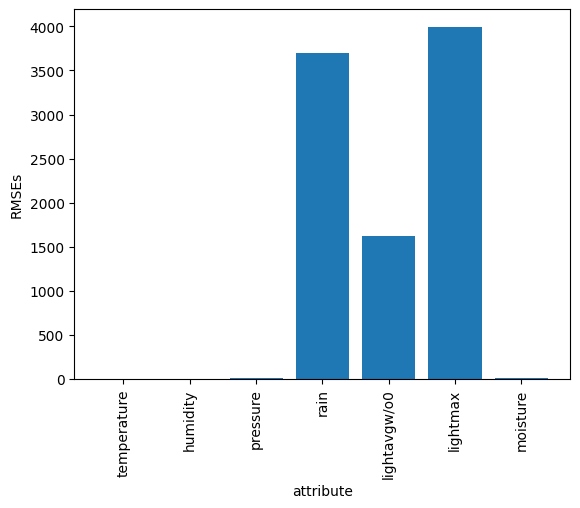

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("landslide_data3_miss.csv")
data2 = pd.read_csv("landslide_data3_original.csv")
data.dropna(subset=["stationid"], inplace=True)

x = []
y = data["stationid"].size
for i in range(int(y)):
    if (data.iloc[i, :].isnull().sum()) >= 3:
        x.append(i)
data = data.drop(x)

data = data.fillna(data.mean())
for x in data:
    if x != "dates" and x != "stationid":
        print("mean of ", x, " is:", data[x].mean(
        ), "  whereas mean in orignal file is:", data2[x].mean())
        print("median of ", x, " is:", data[x].median(
        ), "  whereas median in orignal file is:", data2[x].median())
        print("mode of ", x, " is:", data[x].mode(
        ), "  whereas mode in orignal file is:", data2[x].mode())
        print("sdv of ", x, " is:", data[x].std(
        ), "  whereas mode in orignal file is:", data2[x].std())
        print()
        print()

attribute = []
RMSE = []
for x in data:
    if x != "dates" and x != "stationid":
        attribute.append(x)
        RMSE.append(((data[x] - data2[x]) ** 2).mean() ** .5)
        print("root mean square error for ", x, " is:",
              ((data[x] - data2[x]) ** 2).mean() ** .5)

plt.bar(attribute, RMSE)
plt.xlabel("attribute")
plt.ylabel("RMSEs")
plt.xticks(rotation=90)
plt.show()


mean of  temperature  is: 21.144610263748596   whereas mean in orignal file is: 21.2148881058201
median of  temperature  is: 22.16921   whereas median in orignal file is: 22.27273
mode of  temperature  is: 0    12.72727
Name: temperature, dtype: float64   whereas mode in orignal file is: 0    12.72727
Name: temperature, dtype: float64


mean of  humidity  is: 83.255463989899   whereas mean in orignal file is: 83.47993155555555
median of  humidity  is: 91.0   whereas median in orignal file is: 91.38095
mode of  humidity  is: 0    99.0
Name: humidity, dtype: float64   whereas mode in orignal file is: 0    99.0
Name: humidity, dtype: float64


mean of  pressure  is: 1009.6513573892387   whereas mean in orignal file is: 1009.008773798647
median of  pressure  is: 1014.8813286713   whereas median in orignal file is: 1014.6778321678
mode of  pressure  is: 0    789.392692
Name: pressure, dtype: float64   whereas mode in orignal file is: 0    789.392692
Name: pressure, dtype: float64


mean of 

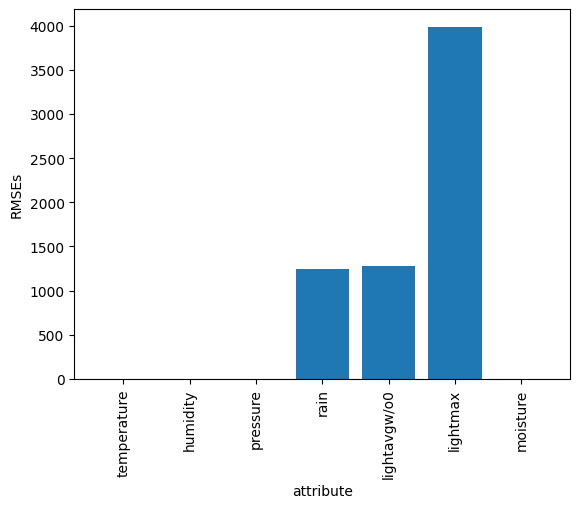

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("landslide_data3_miss.csv")
data2 = pd.read_csv("landslide_data3_original.csv")
data.dropna(subset=["stationid"], inplace=True)

x = []
y = data["stationid"].size
for i in range(int(y)):
    if (data.iloc[i, :].isnull().sum()) >= 3:
        x.append(i)
data = data.drop(x)

data = data.interpolate(method="linear")
for x in data:
    if x != "dates" and x != "stationid":
        print("mean of ", x, " is:", data[x].mean(
        ), "  whereas mean in orignal file is:", data2[x].mean())
        print("median of ", x, " is:", data[x].median(
        ), "  whereas median in orignal file is:", data2[x].median())
        print("mode of ", x, " is:", data[x].mode(
        ), "  whereas mode in orignal file is:", data2[x].mode())
        print()
        print()

attribute = []
RMSE = []
for x in data:
    if x != "dates" and x != "stationid":
        attribute.append(x)
        RMSE.append(((data[x] - data2[x]) ** 2).mean() ** .5)
        print("root mean square error for ", x, " is:",
              ((data[x] - data2[x]) ** 2).mean() ** .5)

plt.bar(attribute, RMSE)
plt.xlabel("attribute")
plt.ylabel("RMSEs")
plt.xticks(rotation=90)
plt.show()


1093.5 0.0 -1093.5
[10, 0]


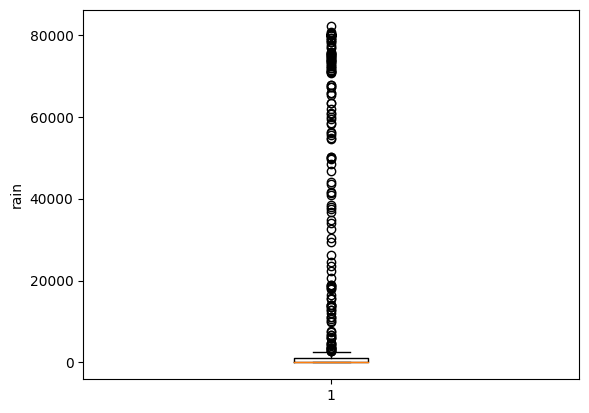

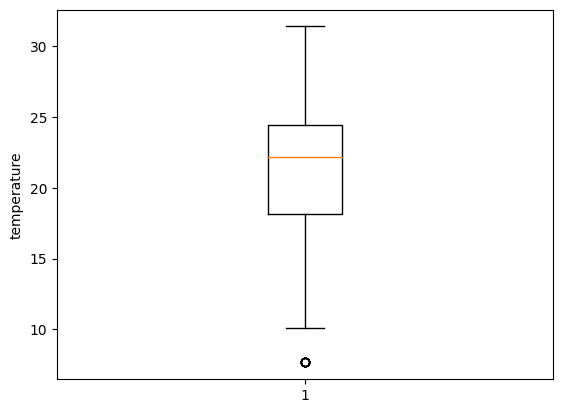

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("landslide_data3_miss.csv")
data2 = pd.read_csv("landslide_data3_original.csv")
data.dropna(subset=["stationid"], inplace=True)

x = []
y = data["stationid"].size
for i in range(int(y)):
    if (data.iloc[i, :].isnull().sum()) >= 3:
        x.append(i)
data = data.drop(x)

data = data.interpolate(method="linear")

Q1 = float(data["rain"].quantile(0.75))
Q3 = float(data["rain"].quantile(0.25))
IQR = Q3-Q1
print(Q1, Q3, IQR)

median_value = data["rain"].median()

outliers = [0, 0]
for x in data["rain"]:
    if (Q1 - (1.5 * IQR) < x) or x < (Q3 + (1.5 * IQR)):
        x = median_value

Q1 = float(data["temperature"].quantile(q=0.75, interpolation="linear"))
Q3 = float(data["temperature"].quantile(q=0.25, interpolation="linear"))
IQR = Q3-Q1

median_value = data["temperature"].median()

for x in data["temperature"]:
    if (Q1 - (1.5 * IQR) < x) or x < (Q3 + (1.5 * IQR)):
        outliers[0] += 1
        x = median_value

print(outliers)

plt.boxplot(data["rain"])
plt.ylabel("rain")
plt.show()

plt.boxplot(data["temperature"])
plt.ylabel("temperature")
plt.show()
